In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import random
%matplotlib inline

In [25]:
sitters = pd.read_csv('rover.csv')

In [26]:
#Copy data about pricing (5 services)
pColumns =['srvBoarding','srvHouseSitting', 'srvDoggyDayCare','srvDropIn','srvDogWalking']
prices = sitters[pColumns].copy()

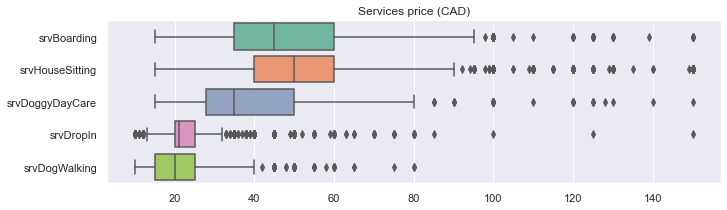

In [27]:
#Display quartiles by price of each service
sns.set(rc={'figure.figsize':(11,3)})
sns.boxplot(data=prices, orient='h', palette='Set2').set(title = 'Services price (CAD)');


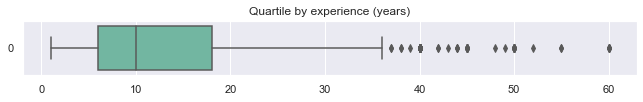

In [28]:
#Display Quartiles years of experience
experience = sitters['yearsExperience'].copy()
sns.set(rc={'figure.figsize':(11,1)})
sns.boxplot(data=experience, orient='h', palette='Set2').set(title = 'Quartile by experience (years)');
#--> Q1: 6, Q2:10, Q3: 18, Q4: 36 yrs

In [29]:
#Copy price of 5 services by yearsExperience
boarding=sitters[['yearsExperience', 'srvBoarding']]
houseSitting=sitters[['yearsExperience', 'srvHouseSitting']]
dogWalking = sitters[['yearsExperience', 'srvDogWalking']]
dropIn = sitters[['yearsExperience', 'srvDropIn']]
doggyDayCare = sitters[['yearsExperience', 'srvDoggyDayCare']]

#Merge 5 services to 1 column --> Display jointplot

boarding = boarding.rename(columns={'srvBoarding':'Price'})
boarding.loc[boarding['Price'] !=0,'Service']='Boarding'

houseSitting = houseSitting.rename(columns={'srvHouseSitting':'Price'})
houseSitting.loc[houseSitting['Price'] !=0,'Service']='House Sitting'

dropIn = dropIn.rename(columns={'srvDropIn':'Price'})
dropIn.loc[dropIn['Price'] !=0,'Service']='Drop In'

dogWalking = dogWalking.rename(columns={'srvDogWalking':'Price'})
dogWalking.loc[dogWalking['Price'] !=0,'Service']='Dog Walking'

doggyDayCare = doggyDayCare.rename(columns={'srvDoggyDayCare':'Price'})
doggyDayCare.loc[doggyDayCare['Price'] !=0,'Service']='Doggy Day Care'

prices = pd.concat([ boarding, houseSitting,doggyDayCare, dropIn, dogWalking], ignore_index = True)


In [30]:
#Backup file for further use
prices.to_csv('sns_price.csv', index=False)

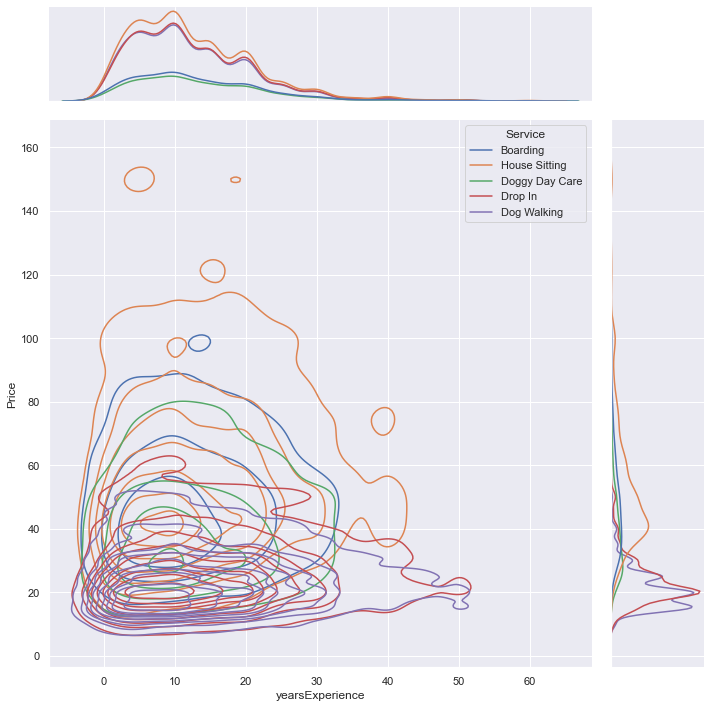

In [31]:
#Display multi services in graph
sns.jointplot(data=prices, x='yearsExperience', y='Price',hue='Service', kind='kde', height=10, dropna = True);

In [32]:
#Copy numReviews & repeateClients to analyze customers response
numReviews=sitters[['yearsExperience', 'numReviews']].loc[sitters['numReviews'] <100]
numRepeat =sitters[['yearsExperience', 'repeatClients']].loc[sitters['repeatClients'] <100]

In [33]:
#Merge to 1 column clientSatisfy.
numReviews = numReviews.rename(columns={'numReviews':'clientSatisfy'})
numReviews.loc[numReviews['clientSatisfy'] !=0,'responseType']='Number of Reviews'

numRepeat = numRepeat.rename(columns={'repeatClients':'clientSatisfy'})
numRepeat.loc[numRepeat['clientSatisfy'] !=0,'responseType']='Repeated clients'

satisfy = pd.concat([ numReviews, numRepeat], ignore_index = True)

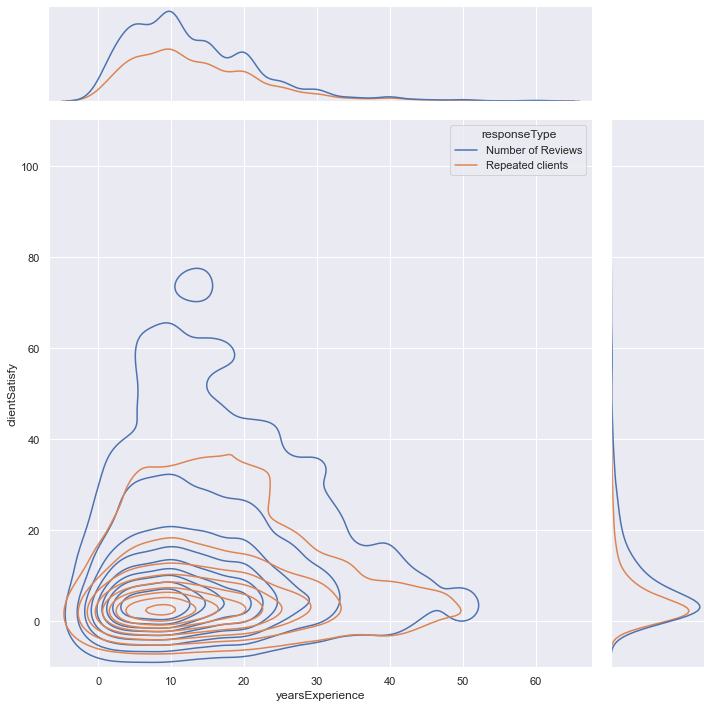

In [34]:
#Display numReviews & repeatClients in one chart
sns.jointplot(data=satisfy, x='yearsExperience', y='clientSatisfy',hue='responseType', kind='kde', height=10, dropna = True);

In [35]:
#Get customers from Toronto to show on map
mColumns = ['sitterName','city', 'srvHouseSitting', 'lat', 'long']
toronto = sitters[sitters.city =='Toronto'][mColumns]
#set color by quartile of House Sitting price
toronto.loc[toronto['srvHouseSitting'] >0, 'color'] = 'lightgray'
toronto.loc[toronto['srvHouseSitting'] >40, 'color'] = 'lightblue'
toronto.loc[toronto['srvHouseSitting'] >50, 'color'] = 'blue'
toronto.loc[toronto['srvHouseSitting'] >60, 'color'] = 'lightgreen'
toronto.loc[toronto['srvHouseSitting'] >90, 'color'] = 'lightred'

icon color:
{'blue', 'beige', 'white', 'purple', 'gray', 'darkred', 'pink', 'orange', 'cadetblue', 'lightblue', 'darkpurple', 'lightgreen', 'black', 'lightgray', 'lightred', 'darkgreen', 'darkblue', 'red', 'green'}
lightgray,  lightblue, blue, lightgreen, lightred

In [36]:
#Show sitters in maps, color by Quartiles: 
#Q1: lightgray; Q2:lightblue; Q3: blue; Q4: lightgreen; Q4+: lightred

maps = folium.Map(location=[43.65, -79.41], zoom_start=15)
for index, sitter in toronto.iterrows():
    folium.Marker(
        location=[sitter['lat'], sitter['long']],
        popup=sitter['sitterName'],
        icon=folium.Icon(color = sitter['color'],icon='user'),
    ).add_to(maps)

maps


In [37]:
#Get top 10 cities have highest number of sitters
top10=sitters.groupby('city')['sitterID'].count().sort_values(ascending = False).head(10)

''

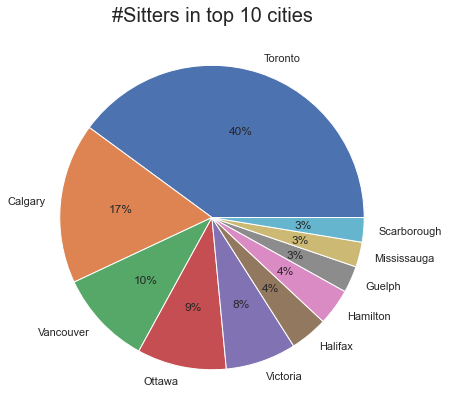

In [38]:
#Show percentage of top 10 in pie chart
top10.plot.pie(y='sitterID', figsize=(7, 7), autopct='%1.0f%%').set(ylabel = '' )
plt.title('#Sitters in top 10 cities', fontsize=20)
;